<a href="https://colab.research.google.com/github/adipurnamk/Belajar-Pengembangan-Machine-Learning/blob/master/Callback_in_Multiclass_Classification_(Iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset [Kaggle](https://www.kaggle.com/uciml/iris)

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/19_420_bundle_archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

os.listdir('/content')

['.config',
 'database.sqlite',
 'Iris.csv',
 '19_420_bundle_archive.zip',
 'sample_data']

In [3]:
import pandas as pd
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
X = dataset[:,0:4]
y = dataset[:,4:7]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='sigmoid'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# kelas callback kita harus inherit tf.keras.callbacks.Callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [6]:
hist = model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0972 - accuracy: 0.4190
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0771 - accuracy: 0.5143
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0603 - accuracy: 0.6762
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0437 - accuracy: 0.6952
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0267 - accuracy: 0.6952
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0082 - accuracy: 0.6952
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9886 - accuracy: 0.6952
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9685 - accuracy: 0.6952
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9468 - accuracy: 0.6952
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9236 - accuracy: 0.6952
Epoch 11/50
4/4 [======================

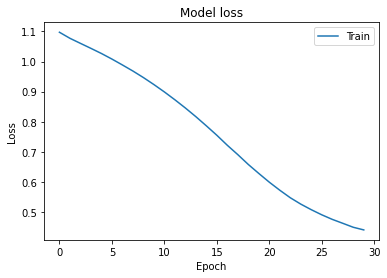

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

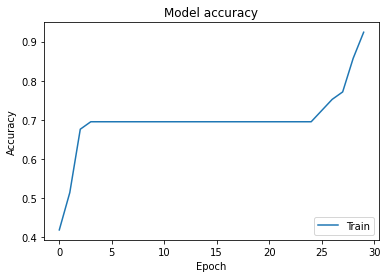

In [8]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()